In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

import random as rand
np.random.seed(1234)

In [2]:
# Scipy Statistics
import scipy.stats as stats
import scipy.optimize as opt

In [3]:
# Gaussian Function
def gauss(x, mean, sigma):
    c = 1/(sigma*np.sqrt(2*np.pi))
    return c*np.exp(-(x - mean)**2/(2*sigma**2))

In [4]:
# Response Matrix
r1  = [0.75,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25]
r2  = [0.25,0.5,0.25,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
r3  = [0.25,0.25,0.5,0.25,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
r4  = [0.25,0.,0.25,0.5,0.25,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
r5  = [0.25,0.,0.,0.25,0.5,0.25,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
r6  = [0.25,0.,0.,0.,0.25,0.5,0.25,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
r7  = [0.25,0.,0.,0.,0.,0.25,0.5,0.25,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
r8  = [0.25,0.,0.,0.,0.,0.,0.25,0.5,0.25,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
r9  = [0.25,0.,0.,0.,0.,0.,0.,0.25,0.5,0.25,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
r10 = [0.25,0.,0.,0.,0.,0.,0.,0.,0.25,0.5,0.25,0.,0.,0.,0.,0.,0.,0.,0.,0.]
r11 = [0.25,0.,0.,0.,0.,0.,0.,0.,0.,0.25,0.5,0.25,0.,0.,0.,0.,0.,0.,0.,0.]
r12 = [0.25,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.25,0.5,0.25,0.,0.,0.,0.,0.,0.,0.]
r13 = [0.25,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.25,0.5,0.25,0.,0.,0.,0.,0.,0.]
r14 = [0.25,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.25,0.5,0.25,0.,0.,0.,0.,0.]
r15 = [0.25,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.25,0.5,0.25,0.,0.,0.,0.]
r16 = [0.25,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.25,0.5,0.25,0.,0.,0.]
r17 = [0.25,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.25,0.5,0.25,0.,0.]
r18 = [0.25,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.25,0.5,0.25,0.]
r19 = [0.25,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.25,0.5,0.25]
r20 = [0.25,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.25,0.75]

R = 0.90 * np.array([r1, r2, r3, r4, r5, r6, r7, r8, r9, r10, r11, 
                     r12, r13, r14, r15, r16, r17, r18, r19, r20])

## _Q.2(d)_

In [15]:
# from Q.2(a), generated sample is s
mu, sigma = 5.04, 2.12

In [18]:
s = stats.norm.rvs(loc=mu, scale=sigma, size=1000)

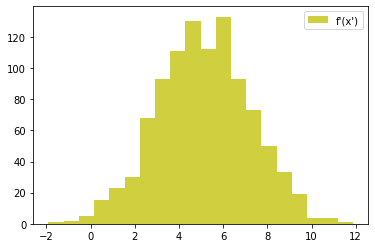

In [19]:
# pyplot for histogram (args passed to np.histogram())
n, bin_edges, patches = plt.hist(s, 20, density=False, facecolor='y', alpha=0.75, label="f'(x')")
plt.legend()
plt.show()

In [20]:
n, bin_edges = np.histogram(s, bins=20, density=False)
bins = 0.5*(bin_edges[1:] + bin_edges[:-1])

### _Matrix Inversion_

In [21]:
R_Inv = np.linalg.inv(R)
R_Inv.shape

(20, 20)

In [22]:
x = np.matmul(R_Inv, n)

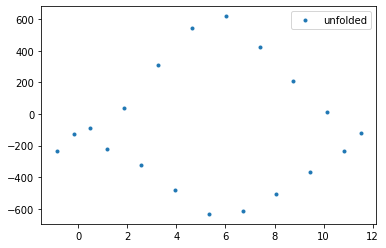

In [23]:
plt.plot(bins[1:], x[1:], '.', label="unfolded")
plt.legend()
plt.show()

### _Uncertainities_


At the moment use **errors**

In [24]:
V = np.zeros((20, 20))
np.fill_diagonal(V, n)

U = np.dot(R_Inv, np.dot(V, R_Inv.T))

sigma = np.sqrt(np.diag(U))

### _Plotting_

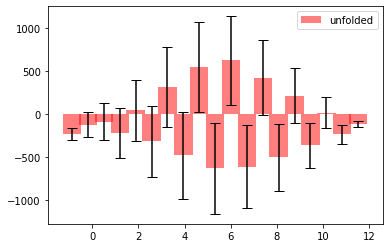

In [25]:
plt.bar(bins[1:], x[1:], yerr=sigma[1:], alpha=0.5, ecolor='black', capsize=5, color='red', label='unfolded')
plt.legend()
plt.show()